# EDA - Students Performance


## Mounting Drive and Importing Modules

In [119]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [120]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

## About the dataset

This data set consists of the marks secured by the students in various subjects.

Contains information such as:
* Gender
* Parents background
* Test preparations
* Scores of three different subjects

And more...

Link [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Analyzing Dataset

In [121]:
# To unzip the folder which contains the CSV file, we use zipfile module
zf = zipfile.ZipFile('/gdrive/MyDrive/Datasets/Zipped Datasets/StudentsPerformance.zip')
df = pd.read_csv(zf.open('StudentsPerformance.csv'))

In [122]:
# Show the first rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [123]:
## Show the shape of the dataset
df.shape

(1000, 8)

In [124]:
## Show all columns
print(f'Columns: {list(df.columns)}')

Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [125]:
## Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [126]:
## Create two list which contains categorical and numerical columns respectivelly
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)

## Printing values
print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Columns: ['math score', 'reading score', 'writing score']


In [127]:
## Show unique values of each columns
df.nunique(axis=0)
## We can see that categorical columns has low unique values

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [128]:
## Show null values of each columns
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [129]:
## Show duplicaded rows
df.duplicated().sum()

0

In [130]:
## As we can see, there are no null values nor duplicaded rows so we dont need to change anything

In [131]:
## Save length of rows and cols in variables
rows, cols = df.shape

print(f'Row length: {rows}, Col length: {cols}')

Row length: 1000, Col length: 8


## Analyzing Categorical Values

In [132]:
## Create a new dataframe only with categorical columns
df_cat_cols = df[cat_cols]

In [133]:
## Show first rows of the new dataframe
df_cat_cols.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [134]:
## Setting plot size and theme
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(style='darkgrid')

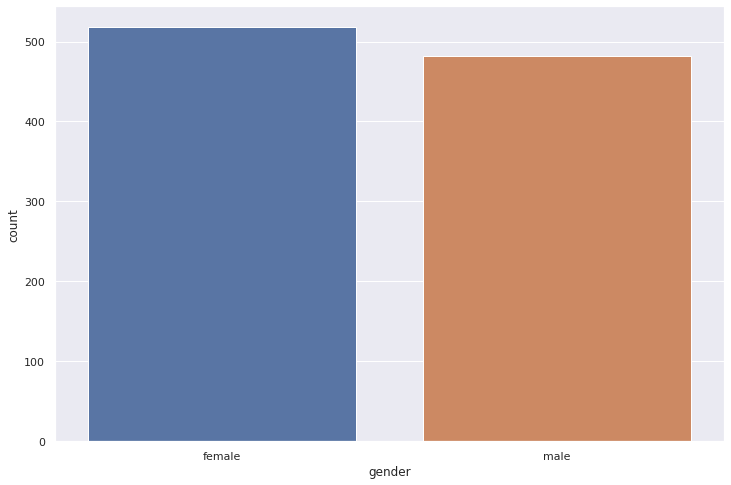

In [135]:
## Show distribution of gender
sns.countplot(data=df_cat_cols, x='gender')

race/ethnicity
group C           319
group D           262
group B           190
group E           140
group A            89
dtype: int64

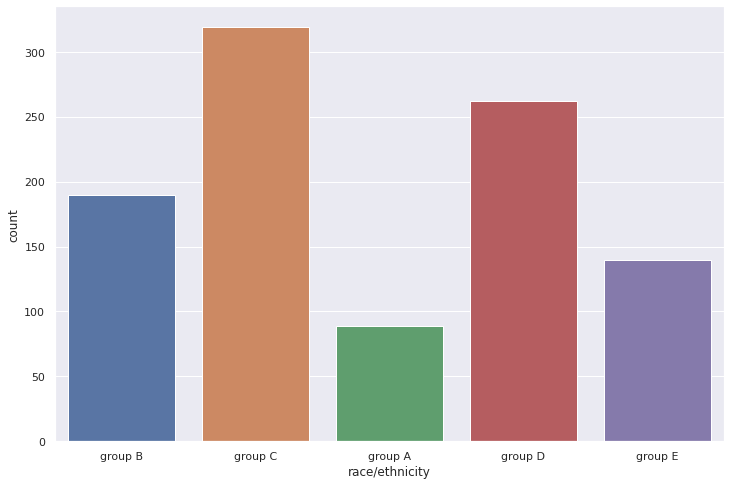

In [136]:
## Show distribution of race/ethnicity
sns.countplot(data=df_cat_cols, x='race/ethnicity')
df_cat_cols[["race/ethnicity"]].value_counts()

"\nsome college => universidad\nassociate's degree => ciclo?\nhigh school => instituto\nbachelor's degree => grado licenciatura\nmaster's degree => máster\n"

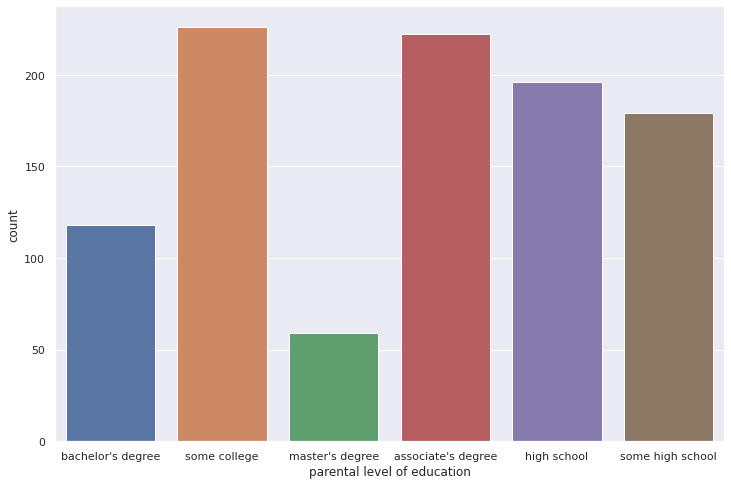

In [137]:
## Show distribution parental level of education
sns.countplot(data=df_cat_cols, x='parental level of education')
df_cat_cols[["parental level of education"]].value_counts()
'''
some college => universidad
associate's degree => ciclo?
high school => instituto
bachelor's degree => grado licenciatura
master's degree => máster
'''

lunch       
standard        645
free/reduced    355
dtype: int64

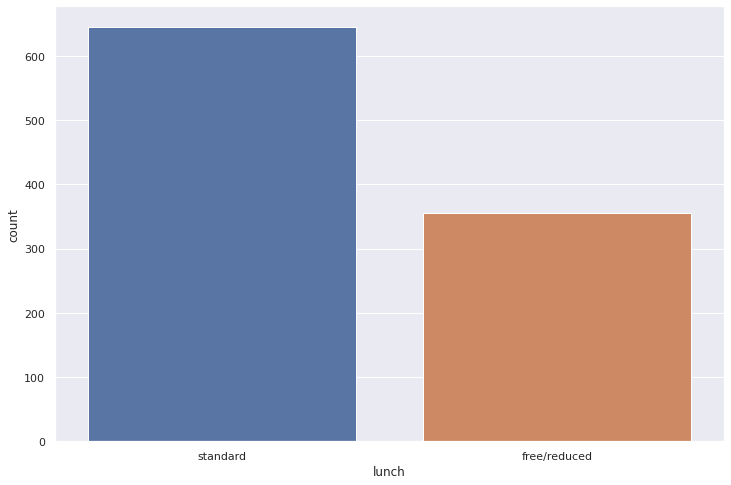

In [138]:
## Show distribution of lunch
sns.countplot(data=df_cat_cols, x='lunch')
df_cat_cols[["lunch"]].value_counts()

test preparation course
none                       642
completed                  358
dtype: int64

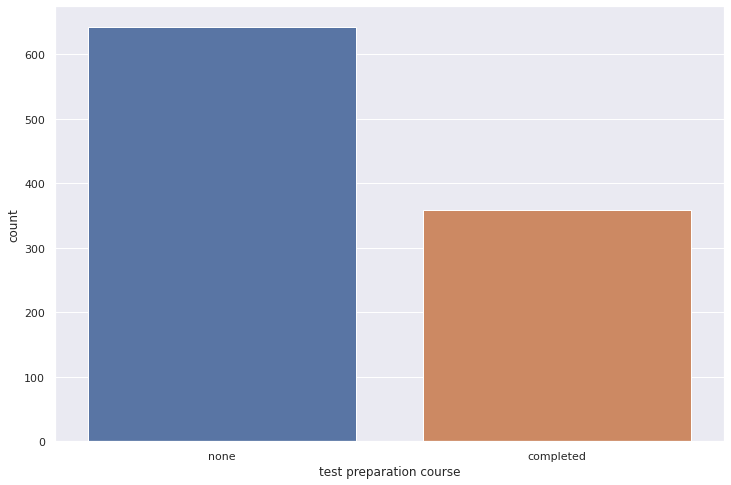

In [139]:
## Show distribution of test preparation course
sns.countplot(data=df_cat_cols, x='test preparation course')
df_cat_cols[["test preparation course"]].value_counts()

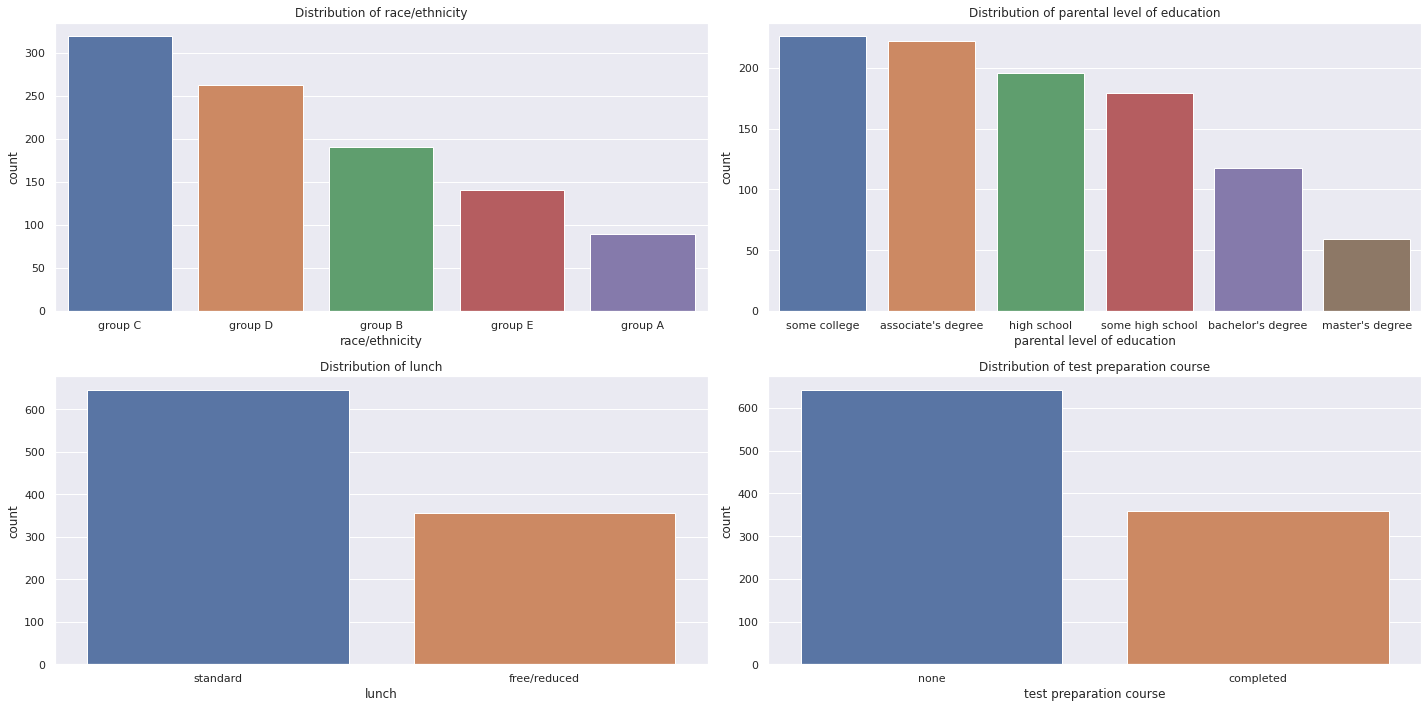

In [140]:
# Show all distributions sorted

fig = plt.figure(1, (20, 10))
for i, cat in enumerate(df_cat_cols.drop(['gender'], axis = 1).columns):
  ax = plt.subplot(2, 2, i + 1)
  sns.countplot(data=df_cat_cols, x = cat, order=df_cat_cols[cat].value_counts().index)
  ax.set_lavel = None
  ax.set_title(f'Distribution of {cat}')
  plt.tight_layout()
plt.show()

In [141]:
## Show dominant values of each columns and they weight
for i, cat in enumerate(df_cat_cols.drop(['gender'], axis = 1).columns):
  val_counts = df_cat_cols[cat].value_counts()
  dominant_frac = val_counts.iloc[0] / rows
  print(f'{val_counts.index[0]} - {round(dominant_frac * 100, 2)} % {cat}')

group C - 31.9 % race/ethnicity
some college - 22.6 % parental level of education
standard - 64.5 % lunch
none - 64.2 % test preparation course


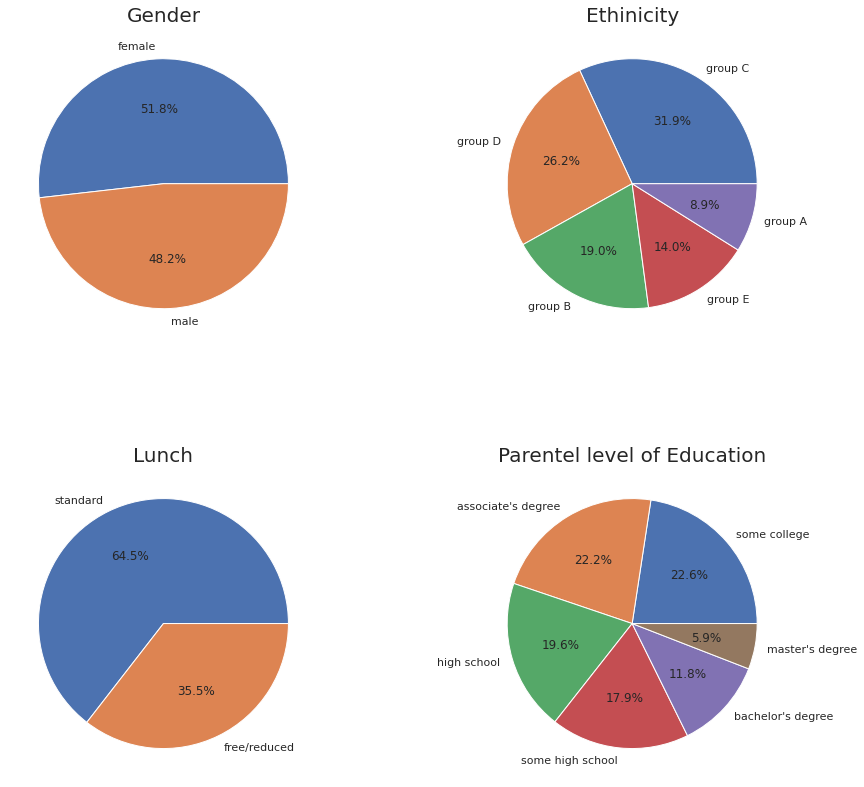

In [142]:
## For more details, we can use plot.pie
plt.figure(figsize=(14,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(221)
plt.title('Gender',fontsize = 20)
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", label="")

plt.subplot(222)
plt.title('Ethinicity',fontsize = 20)
df['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", label="")

plt.subplot(223)
plt.title('Lunch',fontsize = 20)
df['lunch'].value_counts().plot.pie(autopct="%1.1f%%", label="")

plt.subplot(224)
plt.title('Parentel level of Education',fontsize = 20)
df['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%", label="")
plt.show()

**Conclusion:**

La proporción de géneros es más o menos similar.

Existen más estudiantes en los grupos C y D

Existen más estudiantes que tienen una comida estándar

La gran mayoría de los padres de los alumnos han tenido un nivel de educación universitaria.

## Analyzing numerical columns


In [143]:
## Create a new dataframe only with numerical columns
df_num_cols = df[num_cols]

# Use describe to show some statistic information
plt.figure(figsize=[16,8])
# df_num_cols.boxplot()
df_num_cols.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Figure size 1152x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


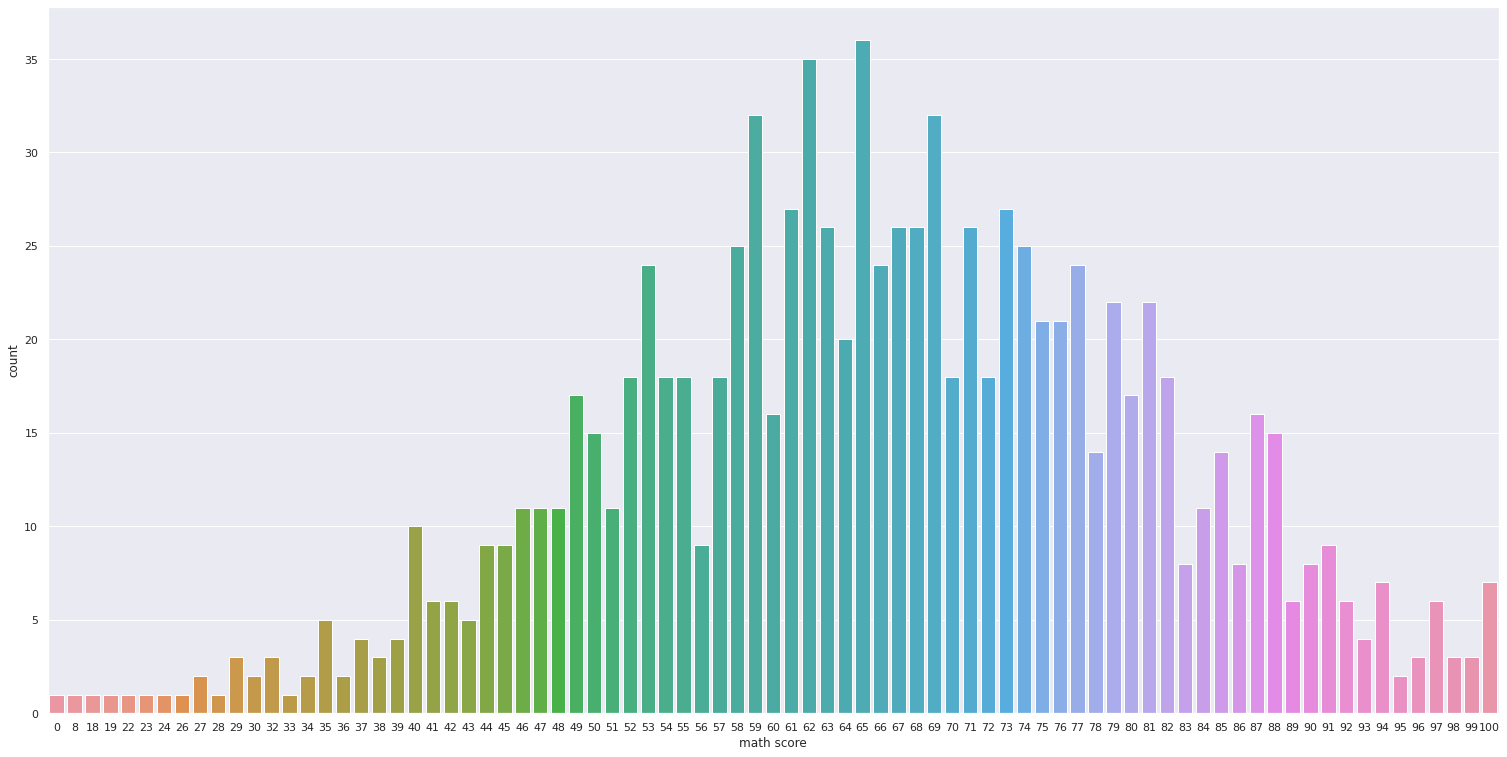

In [144]:
# Show distribution Math Score
fig = plt.figure(1, (26, 13))
sns.countplot(df_num_cols["math score"])

Math Score Standard Deviation in males: 14.34137706033278
Math Score Standard Deviation in females: 15.47649287840331


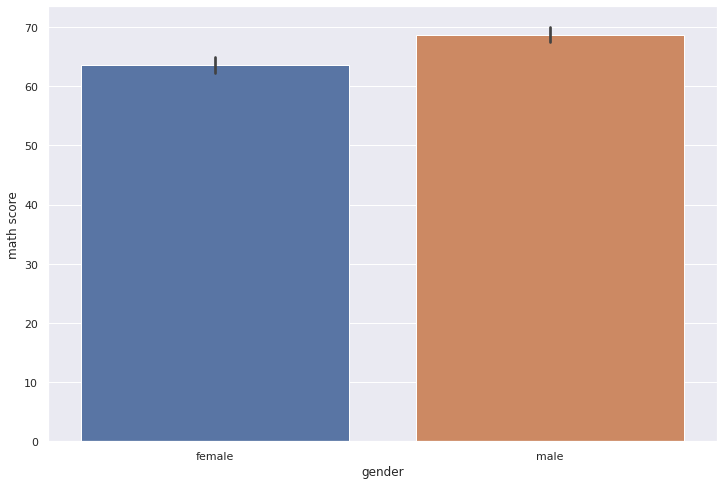

In [145]:
# Using barplot, we can compare which gender has better math score
sns.barplot(x="gender", y="math score", data=df)
# As we can see, males has better scores in maths.
print("Math Score Standard Deviation in males:", np.std(df["math score"].where(df["gender"] == "male")))
print("Math Score Standard Deviation in females:", np.std(df["math score"].where(df["gender"] == "female")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


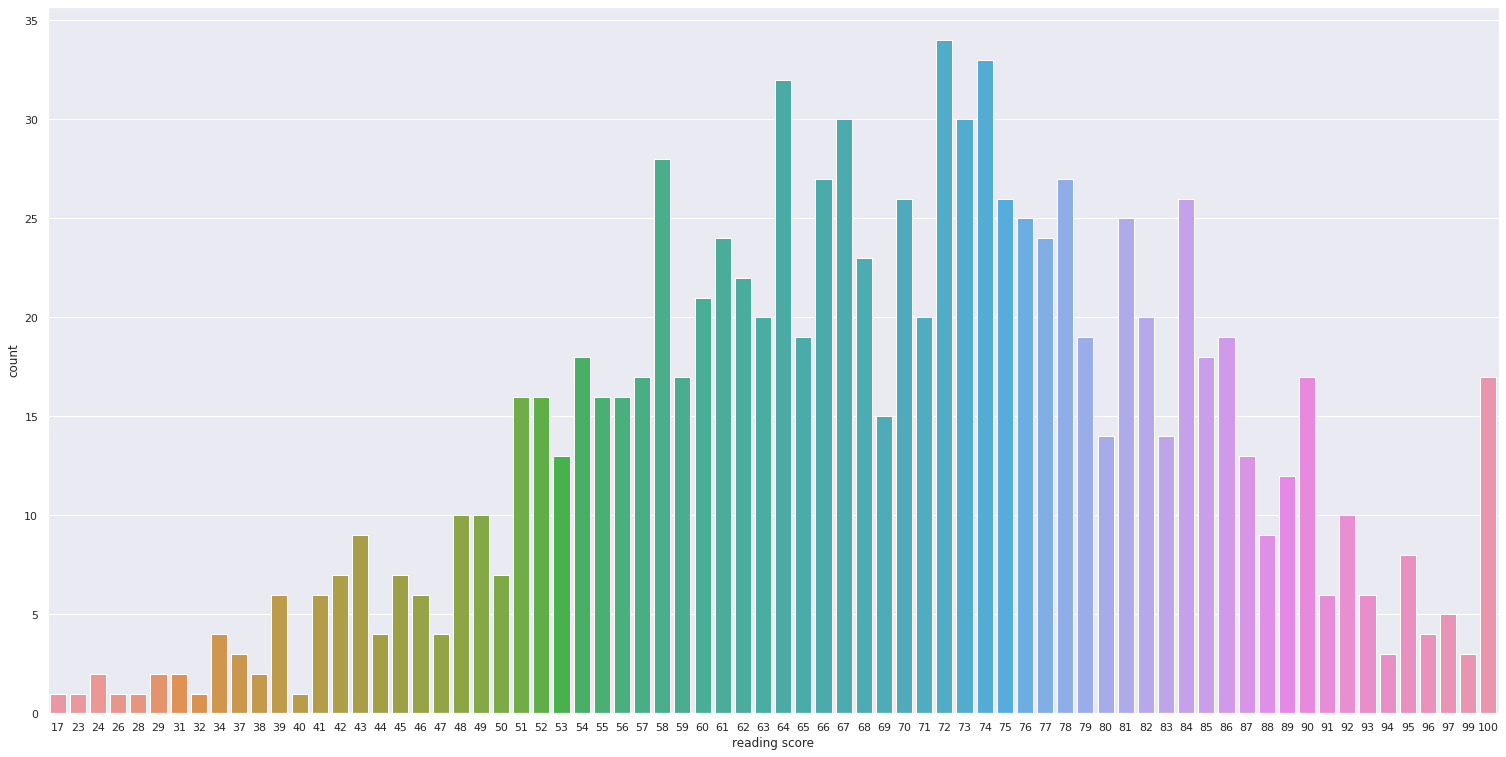

In [146]:
# Show distribution reading Score
fig = plt.figure(1, (26, 13))
sns.countplot(df_num_cols["reading score"])

Reading Score Standard Deviation in males: 13.91737245208702
Reading Score Standard Deviation in females: 14.364359983427269


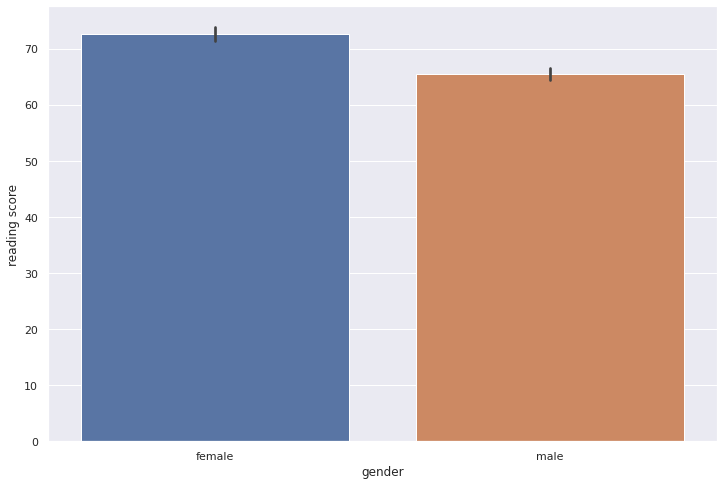

In [147]:
# Using barplot, we can compare which gender has better reading score
sns.barplot(x="gender", y="reading score", data=df)
# On the other hand, females has better scores in reading with less standard deviation than math scores
print("Reading Score Standard Deviation in males:", np.std(df["reading score"].where(df["gender"] == "male")))
print("Reading Score Standard Deviation in females:", np.std(df["reading score"].where(df["gender"] == "female")))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


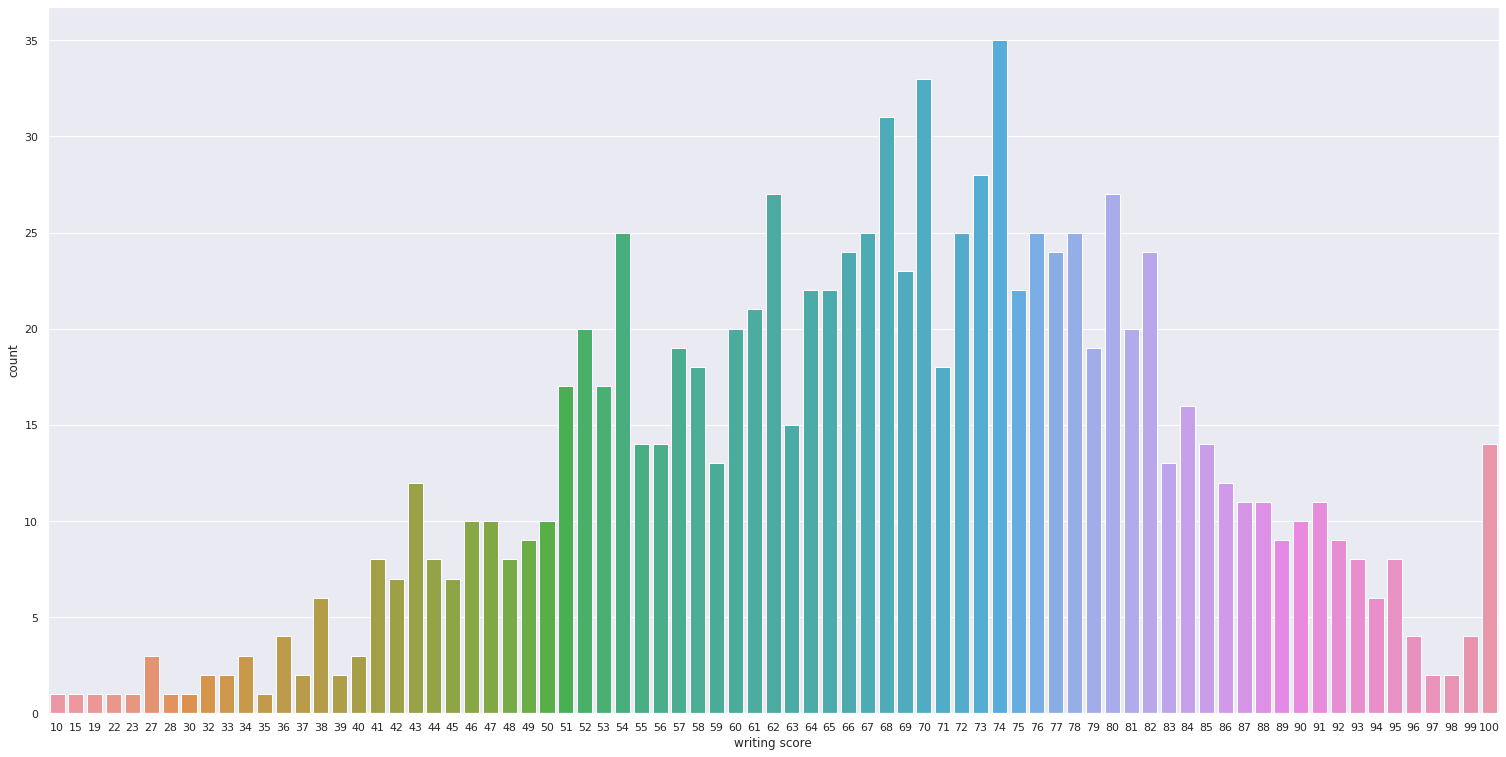

In [148]:
# Show distribution writing Score
fig = plt.figure(1, (26, 13))
sns.countplot(df_num_cols["writing score"])

Writing Score Standard Deviation in males: 14.099183306891103
Writing Score Standard Deviation in females: 14.830505845684566


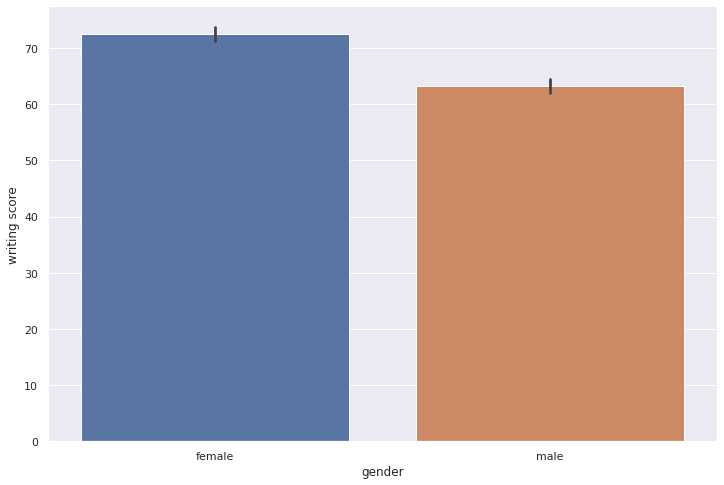

In [149]:
# Using barplot, we can compare which gender has better writing score
sns.barplot(x="gender", y="writing score", data=df)
# In writing score we can observe than females has better scores than males
print("Writing Score Standard Deviation in males:", np.std(df["writing score"].where(df["gender"] == "male")))
print("Writing Score Standard Deviation in females:", np.std(df["writing score"].where(df["gender"] == "female")))

### Conclusion:

* Male have higher scores in subjects related to mathematics.

* On the other hand, female have higher scores in subjects related to letters.

* To confirm this, we need more information related to other subjects.

### Correlation Matrix - Numerical Columns

In [150]:
# We can use corr() function to show the correlation between columns
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


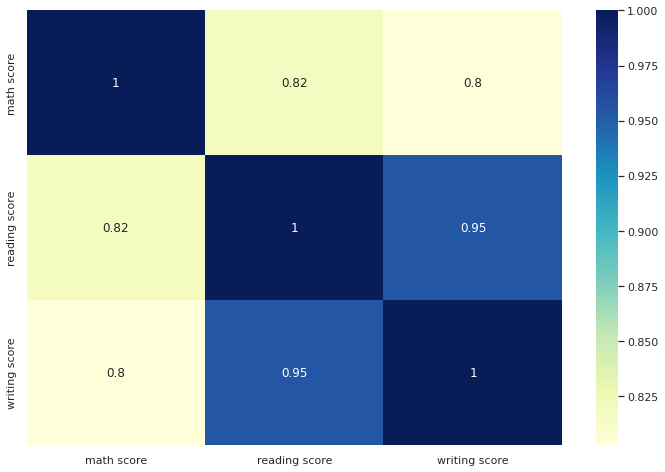

In [151]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

### Conclusion

As we can see, there are more correlation between reading and writing score.
This might be because reading and writing are subjects related to each other.

Also we can observe that math and reading scores has better correlation. It might be because we need a reading comprehention to solve some math problems.

### Analyzing Test Preparation Course

In a previous graph we observed that most students had none test preparation couse.

In this part we're going to analyze this column separating genders

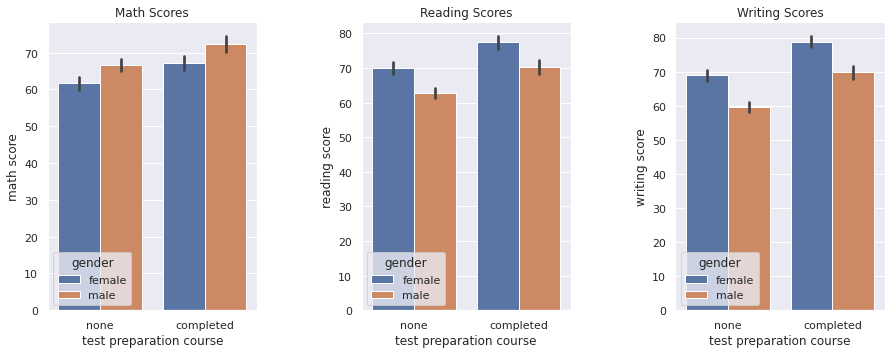

In [152]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=df)
plt.show()

### Conclusion:

* Having the test preparation course completed, gives you better scores.
* In math subject, males that has none test preparation course have the same scores than females that has completed test preparation scores.
* On the other hand, females in reading and writing subjects has the same score with none test preparation course than males that has completed test preparation course.

* We can deduct that females without being completed test preparation course in reading and writing test might have the same scores than males that have completed it.

### Analyzing test preparation course in different race/ethnicity

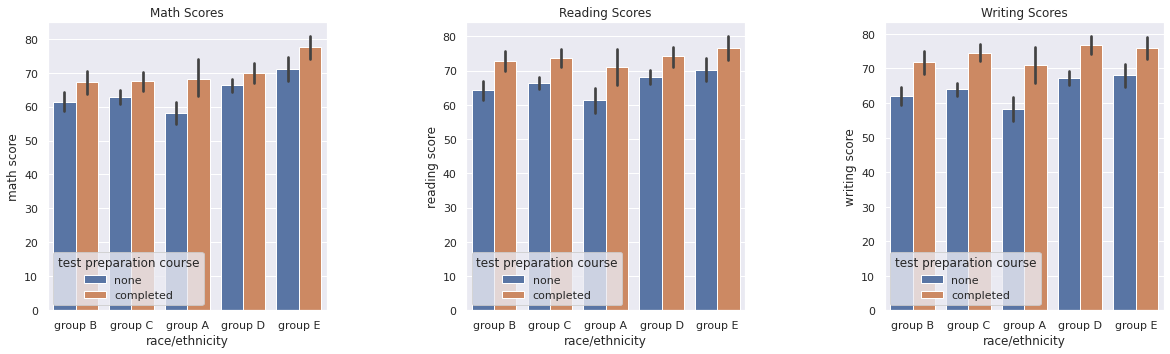

In [153]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="race/ethnicity", y="math score", hue="test preparation course", data=df)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="test preparation course", y="reading score", x="race/ethnicity", data=df)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="test preparation course", y="writing score", x= 'race/ethnicity',data=df)

plt.show()

### Conclusion:

* In math subject, group E has better scores even though they have completed or not test preparation course.
* It also has better reading scores in relation to the test preparation course.
* Group D has almost the same mean score than group E in each subjects.
* Group A with none test preparation course has the lowest scores in every subjects.

## Analyzing test preparation course with other categorical columns

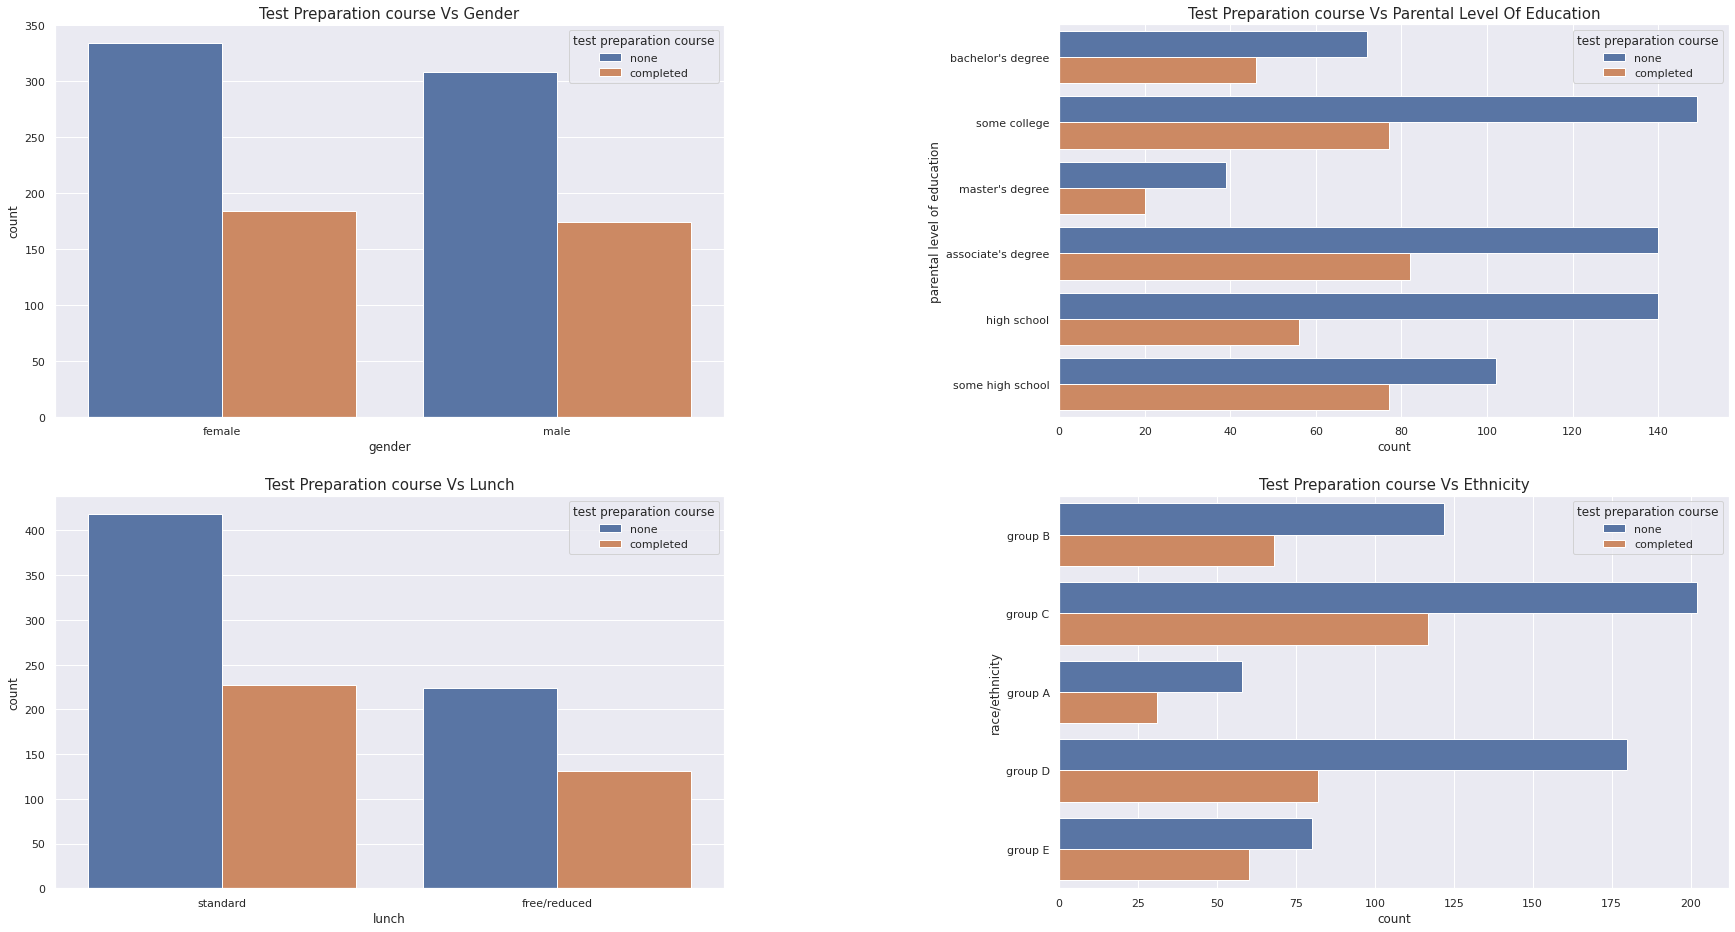

In [154]:
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(221)
plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=df)

plt.subplot(222)
plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)

plt.subplot(223)
plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=df)

plt.subplot(224)
plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)

plt.show()

### Conclusion

* Observing all this graphs, it is true that most students has none test preparation course (this was shown in Analyzing Categorical Columns previously).

* We saw that there were more female students in the dataset. In relation with the amount of students per gender, we can observe that there were more female that has completed test preparation course.

*  Students that their parents has some highschool level of education has completed test preparation course.

*  Test preparation course vs Lunch are proportionaly the same. Students that has standard lunch and completed test preparation course is almost the same that free/reduced lunch with none test preparation course.

* In ethnicity, we can observe that group E has most completed test preparation course in relation with all students 


## Analyzing Gender vs Ethnicity

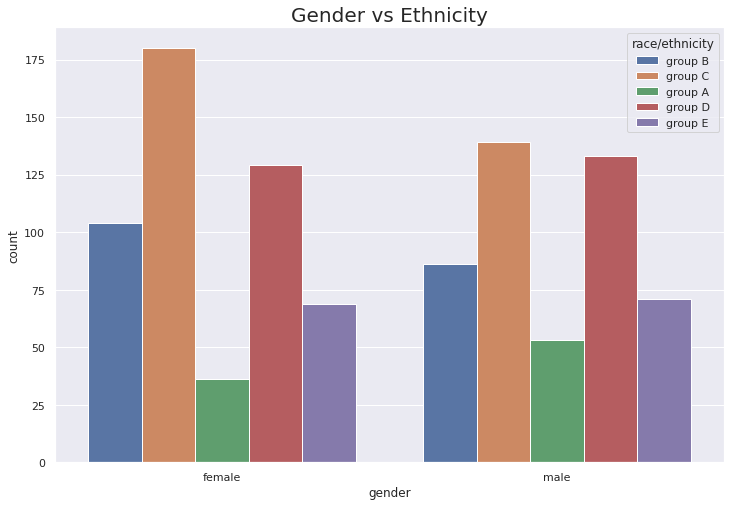

In [155]:
plt.title("Gender vs Ethnicity", fontsize = 20)
sns.countplot(x="gender", hue="race/ethnicity", data=df)

In [156]:
print("Total students in each race/ethnicity:")
print(df["race/ethnicity"].value_counts())
print("----------------------------------")
print("Total male: ")
print(df["race/ethnicity"].where(df["gender"] == "male").value_counts())
print("----------------------------------")
print("Total female: ")
print(df["race/ethnicity"].where(df["gender"] == "female").value_counts())

Total students in each race/ethnicity:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
----------------------------------
Total male: 
group C    139
group D    133
group B     86
group E     71
group A     53
Name: race/ethnicity, dtype: int64
----------------------------------
Total female: 
group C    180
group D    129
group B    104
group E     69
group A     36
Name: race/ethnicity, dtype: int64


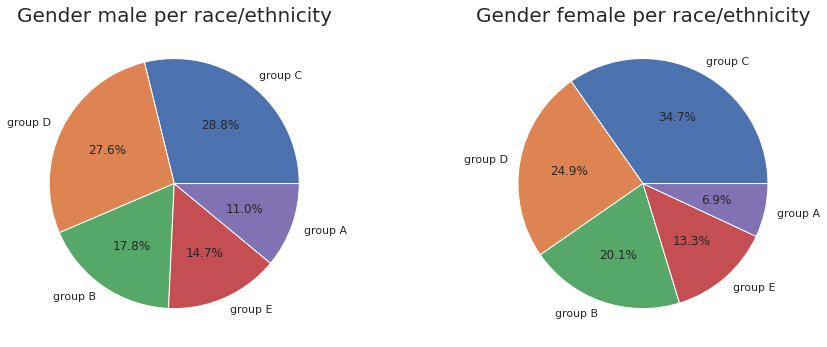

In [157]:
## Again, for more details, we can use plot.pie
plt.figure(figsize=(14,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(121)
plt.title('Gender male per race/ethnicity',fontsize = 20)
df["race/ethnicity"].where(df["gender"] == "male").value_counts().plot.pie(autopct="%1.1f%%", label="")

plt.subplot(122)
plt.title('Gender female per race/ethnicity',fontsize = 20)
df["race/ethnicity"].where(df["gender"] == "female").value_counts().plot.pie(autopct="%1.1f%%", label="")
plt.show()

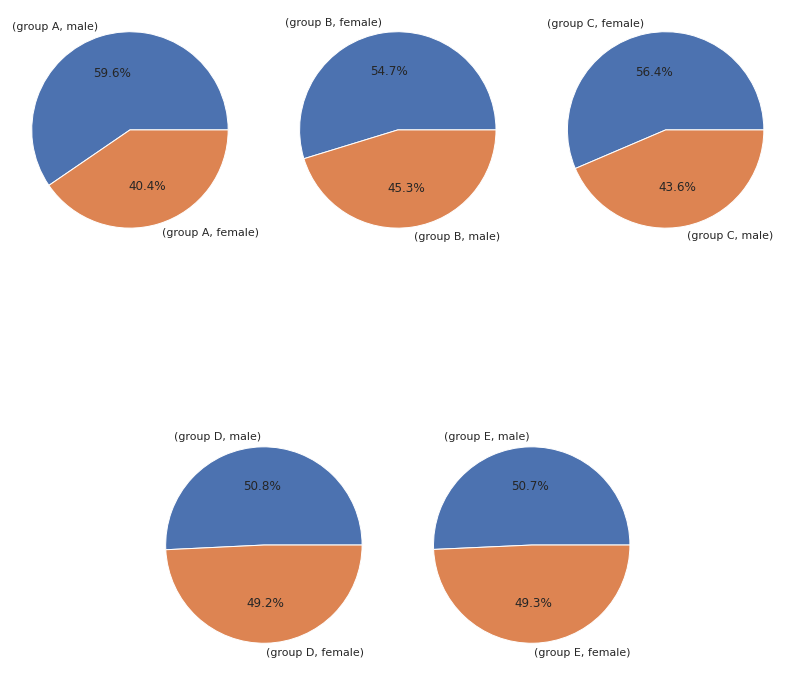

In [174]:
plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)

df[["race/ethnicity","gender"]].where(df["race/ethnicity"] == "group A").value_counts().plot.pie(autopct="%1.1f%%", label="")

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)

df[["race/ethnicity","gender"]].where(df["race/ethnicity"] == "group B").value_counts().plot.pie(autopct="%1.1f%%", label="")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)

df[["race/ethnicity","gender"]].where(df["race/ethnicity"] == "group C").value_counts().plot.pie(autopct="%1.1f%%", label="")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)

df[["race/ethnicity","gender"]].where(df["race/ethnicity"] == "group D").value_counts().plot.pie(autopct="%1.1f%%", label="")

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

df[["race/ethnicity","gender"]].where(df["race/ethnicity"] == "group E").value_counts().plot.pie(autopct="%1.1f%%", label="")

plt.show()

### Conclusion

As we saw before, there are more female students in the dataset and in this graph, we can observe that in almost most groups there are more female than male.
* Group A has the most male students with almost 60%.
* Group C has the most female students with almost 55%.
* Group E and group D are the most equitative group having a bit more male than female.

### Analyzing Parental Level of Education

In this part we show parental level of education in each race/ethnicity

In [159]:
# We use crosstab to cross two columns and obtaining a percentage
re_ple = pd.crosstab(df["race/ethnicity"], df["parental level of education"], normalize='index')
re_ple

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,0.157303,0.134831,0.202247,0.033708,0.202247,0.269663
group B,0.215789,0.105263,0.252632,0.031579,0.194737,0.200000
group C,0.244514,0.125392,0.200627,0.059561,0.216301,0.153605
group D,0.190840,0.106870,0.167939,0.087786,0.255725,0.190840
group E,0.278571,0.128571,0.157143,0.057143,0.250000,0.128571


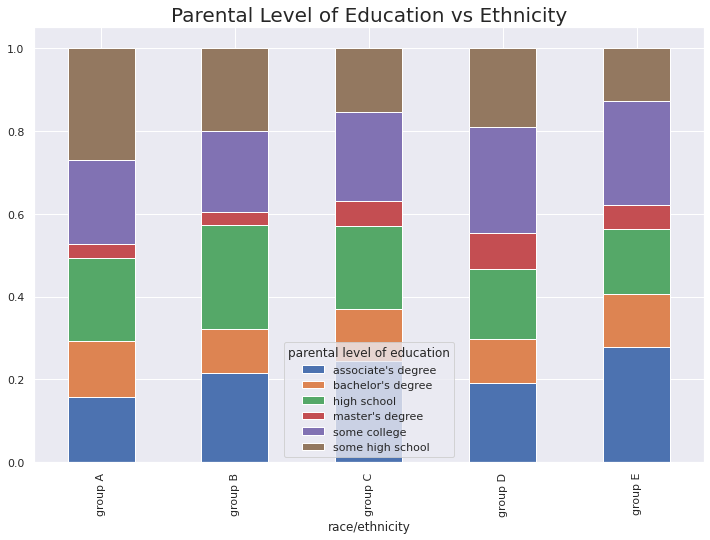

In [160]:
re_ple.plot.bar(stacked = True)
plt.title("Parental Level of Education vs Ethnicity", fontsize = 20)
plt.show()

### Conclusion

Most students has parents that got level of education some highschool or highschool.

Less common parental level of education in each race/ethnicity is master's degree.


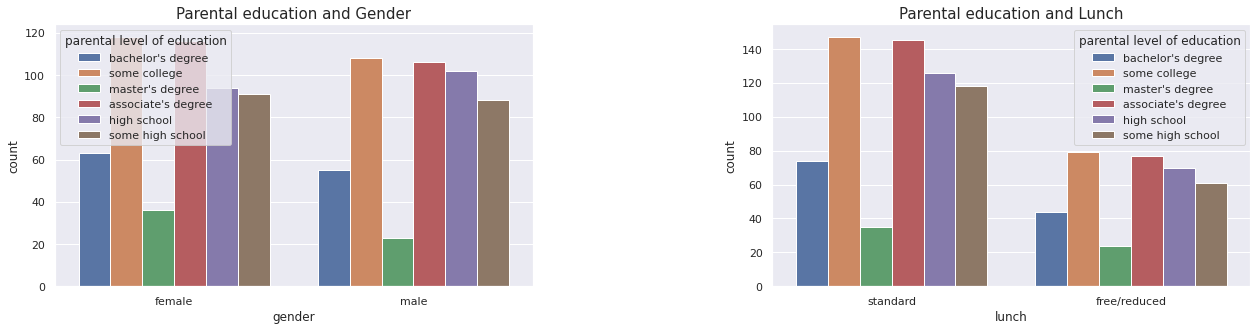

In [161]:
plt.figure(figsize=(60,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(251)
plt.title('Parental education and Gender',fontsize=15)
sns.countplot(hue="parental level of education", x="gender", data=df)
plt.subplot(252)
plt.title('Parental education and Lunch',fontsize=15)
sns.countplot(hue="parental level of education", x="lunch", data=df)

plt.show()

### Conclusion:

* Some college and associate's degree are the most common parental level of education in each gender.
* Also master's degree is the least common.

* In lunch there are almost proportional.